<h1>Installing RDKit</h1>

In [1]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e

add /home/ali/miniconda/lib/python3.6/site-packages to PYTHONPATH
all packages are already installed


In [2]:
import rdkit
import deepchem as dc

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('dataset.csv')
df = df.dropna()

In [5]:
df

,ID,dataset group name,Dataset Name,Host,Guest,Ex _G_(kcal/mol),Ex _G_SEM,EX _H_(kcal/mol),EX _H_SEM,pb_guest_Etot,...,gb_host_1-4EEL,gb_host_EELEC,gb_host_EGB,gb_host_ESURF,gb_delta_H,pb_delta_H,EX _delta_H_(kcal/mol),gb_Ex_difference,SQR_gbnsr6_Ex_difference,pb_Ex_difference
0,1.0,Mobley benchmarkset,cd-set1,acd,guest-1,-1.575,0.019,-2.170,0.050,-47.8832,...,423.5761,-428.9520,-96.4471,5.1691,-1.9950,-0.8408,-2.170,0.1750,0.030625,1.3292
1,2.0,Mobley benchmarkset,cd-set1,acd,guest-2,-3.533,0.004,-4.190,0.020,-52.0758,...,412.6663,-397.9784,-106.4154,5.0726,-11.2624,-8.4809,-4.190,-7.0724,50.018842,-4.2909
2,3.0,Mobley benchmarkset,cd-set1,acd,guest-3,-4.606,0.007,-5.460,0.030,-51.5323,...,426.2925,-429.3068,-95.2452,5.1352,-15.4074,-13.8234,-5.460,-9.9474,98.950767,-8.3634
3,4.0,Mobley benchmarkset,cd-set1,acd,guest-4,-2.130,0.016,-2.740,0.020,2.3898,...,420.0687,-416.5215,-97.4461,5.0849,-10.5586,-11.3319,-2.740,-7.8186,61.130506,-8.5919
4,5.0,Mobley benchmarkset,cd-set1,acd,guest-5,-2.510,0.060,-2.990,0.230,-3.2280,...,425.7315,-435.9689,-91.2312,5.0881,-14.5517,-14.0485,-2.990,-11.5617,133.672907,-11.0585
5,6.0,Mobley benchmarkset,cd-set1,acd,guest-6,-1.506,0.036,-2.530,0.120,-56.4635,...,422.4095,-421.3737,-99.7968,5.1792,-5.8526,-7.6596,-2.530,-3.3226,11.039671,-5.1296
6,7.0,Mobley benchmarkset,cd-set1,acd,guest-7,-3.380,0.005,-3.400,0.020,-71.4929,...,422.3651,-398.7469,-106.3300,5.0312,-11.8633,-11.0241,-3.400,-8.4633,71.627447,-7.6241
7,8.0,Mobley benchmarkset,cd-set1,acd,guest-8,-4.622,0.017,-4.890,0.030,-70.0470,...,418.4633,-421.1437,-95.0137,5.1211,-15.8181,-14.5525,-4.890,-10.9281,119.423370,-9.6625
8,9.0,Mobley benchmarkset,cd-set1,acd,guest-9,-1.685,0.018,-2.570,0.060,-40.7839,...,426.4985,-421.9704,-93.9633,5.2166,-2.7851,-1.3499,-2.570,-0.2151,0.046268,1.2201
9,10.0,Mobley benchmarkset,cd-set1,acd,guest-10,-1.764,0.020,-2.680,0.070,15.6104,...,421.9775,-406.1717,-103.9776,5.0478,-4.0922,-1.9281,-2.680,-1.4122,1.994309,0.7519


<h1>Reading Mobley PDB files</h1>
<p>Here each PDB file will be read and saved in Mol data type defined in RDKit and used by DeepChem</p>

In [6]:
PDBs = {}
from os import listdir
from os.path import isfile, join
mypath = 'mobley-dry-complex-pdb'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for f in onlyfiles:
    PDBs.update({f.split('.')[0].replace('-p', '') : rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)})

<h1>Featurizing</h1>
<p>GraphConv model needs ConvMolFeaturizer</p>

In [7]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)

In [12]:
X = []
X_ids = []
one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
for k in PDBs.keys():
    X_ids.append(k)
    X.append(featurizer.featurize(PDBs[k]))
X = [x[0] for x in X]

In [9]:
host_names = [i.split('-')[0] for i in X_ids]
guest_names = ['guest-' + (i.split('-')[1].replace('s', '')) for i in X_ids]

In [11]:
x_add, y = [], []
for i in range(len(host_names)):
    new_df = df[(df['Host'] == host_names[i]) & (df['Guest'] == guest_names[i])]
    y.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y = np.array(y)   

In [81]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

x_preprocessed = []
x_shapes = []
## for X train
for i in range(len(X)):
    multiConvMol = ConvMol.agglomerate_mols([X[i]])
    new_x_preprocessed = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
    for k in range(1, len(multiConvMol.get_deg_adjacency_lists())):
        new_x_preprocessed.append(multiConvMol.get_deg_adjacency_lists()[k])
    new_x_preprocessed.append(np.array(x_add[i]))
    print([f.shape for f in new_x_preprocessed])
    break
    new_x_preprocessed.append(np.array([f.shape[0] for f in new_x_preprocessed]))
    x_preprocessed.append(new_x_preprocessed)

[(84, 75), (11, 2), (84,), (24, 1), (24, 2), (36, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (15,)]


In [71]:
[75, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[75, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [80]:
x_preprocessed[0][14]

array([84, 11, 84, 24, 24, 36,  0,  0,  0,  0,  0,  0,  0, 15])

In [75]:
x = []
for k in range(len(x_preprocessed)):
    new_x = np.full([15, np.max([v.shape[0] for v in x_preprocessed[k]]),
                      np.max([v.shape[1] for v in x_preprocessed[k] if len(v.shape) > 1])], 1.123456)
    for i,j in enumerate(x_preprocessed[k]):
        if len(j.shape) > 1:
            new_x[i][:j.shape[0],:j.shape[1]] = np.array(j)
        else:
            new_x[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
#     new_x = new_x.reshape([1] + list(x_train.shape))
    x.append(new_x)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

<h1>Creating Model</h1>

In [83]:
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
input_shapes2 = [75, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]

In [92]:
[[int(a),b] for a,b in zip(x_train[0][14][x_train[0][14] != 1.123456], input_shapes2)]

[[72, 75],
 [11, 2],
 [72, 0],
 [20, 1],
 [22, 2],
 [30, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [15, 0]]

In [90]:
np.concatenate([x_train[0][14][x_train[0][14] != 1.123456], input_shapes2], axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [29]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers

batch_size = int(len(df) / 2)

class GBGraphConvModel(tf.keras.Model):

  def __init__(self):
    super(GBGraphConvModel, self).__init__()
    self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)
    self.dense3 = layers.Dense(1, 
         kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
         bias_initializer=initializers.Zeros())

  def call(self, inputs):
#     inputs = inputs[0]
    for i in range(len(inputs)):
        x = []
        input_shapes = [[int(a),b] for a,b in zip(inputs[i][14][inputs[i][14] != 1.123456], input_shapes2)]
    #     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
    #                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
        for i in range(len(input_shapes)):
            x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], input_shapes[i]))
        for i in range(1, len(input_shapes)):
            x[i] = tf.cast(x[i], tf.int32)
        x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [15])
        gc1_output = self.gc1(x)
        batch_norm1_output = self.batch_norm1(gc1_output)
        gp1_output = self.gp1([batch_norm1_output] + x[1:])

        gc2_output = self.gc2([gp1_output] + x[1:])
        batch_norm2_output = self.batch_norm1(gc2_output)
        gp2_output = self.gp2([batch_norm2_output] + x[1:])

        dense1_output = self.dense1(gp2_output)
        batch_norm3_output = self.batch_norm3(dense1_output)
        readout_output = self.readout([batch_norm3_output] + x[1:])

        model_var = self.dense2(readout_output)
        binding_affinity = tf.concat([model_var, x_add], axis=1)
    return self.dense3(binding_affinity)
model = GBGraphConvModel()
model.compile(loss='mse', optimizer='adam')

In [30]:
history = model.fit(x_train, y_train, epochs=100)

ValueError: Data cardinality is ambiguous:
  x sizes: 75, 11, 75, 20, 25, 30, 0, 0, 0, 0, 0, 0, 0, 0, 137, 11, 137, 18, 61, 58, 0, 0, 0, 0, 0, 0, 0, 0, 85, 11, 85, 24, 25, 36, 0, 0, 0, 0, 0, 0, 0, 0, 139, 11, 139, 19, 61, 59, 0, 0, 0, 0, 0, 0, 0, 0, 86, 11, 86, 22, 28, 36, 0, 0, 0, 0, 0, 0, 0, 0, 144, 11, 144, 24, 56, 64, 0, 0, 0, 0, 0, 0, 0, 0, 72, 11, 72, 21, 20, 31, 0, 0, 0, 0, 0, 0, 0, 0, 84, 11, 84, 24, 24, 36, 0, 0, 0, 0, 0, 0, 0, 0, 72, 11, 72, 19, 22, 31, 0, 0, 0, 0, 0, 0, 0, 0, 85, 11, 85, 23, 26, 35, 1, 0, 0, 0, 0, 0, 0, 0, 140, 11, 140, 19, 63, 57, 1, 0, 0, 0, 0, 0, 0, 0, 89, 11, 89, 23, 29, 37, 0, 0, 0, 0, 0, 0, 0, 0, 86, 11, 86, 23, 26, 37, 0, 0, 0, 0, 0, 0, 0, 0, 88, 11, 88, 24, 26, 38, 0, 0, 0, 0, 0, 0, 0, 0, 75, 11, 75, 21, 23, 31, 0, 0, 0, 0, 0, 0, 0, 0, 89, 11, 89, 24, 27, 38, 0, 0, 0, 0, 0, 0, 0, 0, 89, 11, 89, 24, 27, 38, 0, 0, 0, 0, 0, 0, 0, 0, 138, 11, 138, 19, 60, 59, 0, 0, 0, 0, 0, 0, 0, 0, 72, 11, 72, 20, 22, 30, 0, 0, 0, 0, 0, 0, 0, 0, 71, 11, 71, 19, 21, 31, 0, 0, 0, 0, 0, 0, 0, 0, 88, 11, 88, 24, 26, 38, 0, 0, 0, 0, 0, 0, 0, 0, 73, 11, 73, 21, 21, 31, 0, 0, 0, 0, 0, 0, 0, 0, 87, 11, 87, 23, 27, 37, 0, 0, 0, 0, 0, 0, 0, 0, 74, 11, 74, 21, 22, 31, 0, 0, 0, 0, 0, 0, 0, 0, 85, 11, 85, 24, 25, 36, 0, 0, 0, 0, 0, 0, 0, 0, 86, 11, 86, 24, 26, 36, 0, 0, 0, 0, 0, 0, 0, 0, 86, 11, 86, 23, 28, 35, 0, 0, 0, 0, 0, 0, 0, 0, 84, 11, 84, 23, 26, 35, 0, 0, 0, 0, 0, 0, 0, 0, 143, 11, 143, 23, 57, 63, 0, 0, 0, 0, 0, 0, 0, 0, 72, 11, 72, 21, 20, 31, 0, 0, 0, 0, 0, 0, 0, 0, 74, 11, 74, 21, 22, 31, 0, 0, 0, 0, 0, 0, 0, 0, 138, 11, 138, 19, 60, 59, 0, 0, 0, 0, 0, 0, 0, 0, 74, 11, 74, 21, 22, 31, 0, 0, 0, 0, 0, 0, 0, 0, 74, 11, 74, 19, 24, 31, 0, 0, 0, 0, 0, 0, 0, 0, 72, 11, 72, 20, 22, 30, 0, 0, 0, 0, 0, 0, 0, 0
  y sizes: 35
Please provide data which shares the same first dimension.

In [22]:
model.layers[-1].weights

[<tf.Variable 'gb_graph_conv_model/dense_2/kernel:0' shape=(16, 1) dtype=float32, numpy=
 array([[ 0.5879942 ],
        [-1.0379418 ],
        [-1.004969  ],
        [ 0.9896645 ],
        [ 1.0018033 ],
        [ 0.9987933 ],
        [ 0.9962653 ],
        [ 1.0051613 ],
        [-1.0344326 ],
        [-0.98699063],
        [-0.9987951 ],
        [-0.98474455],
        [-0.99655116],
        [-1.0011986 ],
        [-1.0044281 ],
        [-0.9958543 ]], dtype=float32)>,
 <tf.Variable 'gb_graph_conv_model/dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.00819401], dtype=float32)>]

In [18]:
4.60**2

21.159999999999997

In [20]:
input_shapes = [i.shape for i in x_preprocessed_test]

In [21]:
model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 0s 1ms/step - loss: 38.7065


38.706504821777344

In [28]:
np.sqrt(38.70)

6.220932405998316

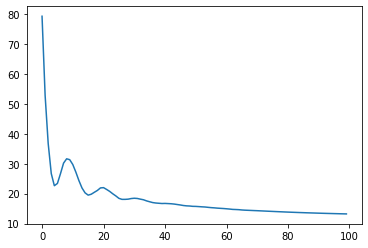

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [94]:
df.columns

Index(['ID', 'dataset group name', 'Dataset Name', 'Host', 'Guest',
       'Ex _G_(kcal/mol)', 'Ex _G_SEM', 'EX _H_(kcal/mol)', 'EX _H_SEM',
       'pb_guest_Etot', 'pb_guest_VDWAALS', 'pb_guest_EELEC', 'pb_guest_EPB',
       'pb_guest_ECAVITY', 'pb_host_Etot', 'pb_host_VDWAALS', 'pb_host_EELEC',
       'pb_host_EPB', 'pb_host_ECAVITY', 'pb_complex_Etot',
       'pb_complex_VDWAALS', 'pb_complex_EELEC', 'pb_complex_EPB',
       'pb_complex_ECAVITY', 'gb_Complex_Etot', 'gb_Complex_1-4EEL',
       'gb_Complex_EELEC', 'gb_Complex_EGB', 'gb_Complex_ESURF',
       'gb_guest_Etot', 'gb_guest_1-4EEL', 'gb_guest_EELEC', 'gb_guest_EGB',
       'gb_guest_ESURF', 'gb_host_Etot', 'gb_host_1-4EEL', 'gb_host_EELEC',
       'gb_host_EGB', 'gb_host_ESURF', 'gb_delta_H', 'pb_delta_H',
       'EX _delta_H_(kcal/mol)', 'gb_Ex_difference',
       'SQR_gbnsr6_Ex_difference', 'pb_Ex_difference'],
      dtype='object')

In [97]:
np.sqrt(np.mean((df['EX _H_(kcal/mol)'].to_numpy() - df['gb_delta_H'].to_numpy())**2))

8.485930943559929

In [98]:
(8.48 - 5.83)

2.6500000000000004